# Naive Bayes classifier



A Naive Bayes classifier is a type of probabilistic machine learning model commonly used for sorting things into different groups. It's especially popular in tasks involving understanding human language (like in natural language processing or text classification), identifying spam in emails, figuring out the sentiment behind a piece of text, and more. The model relies on a statistical concept called Bayes' theorem and makes a "naive" assumption that the different characteristics we're looking at are independent of each other. Despite this oversimplification, Naive Bayes often turns out to be surprisingly effective in real-world situations.


Naive Bayes classifier calculates the probability of an event in the following steps:

* Step 1: Calculate the prior probability for given class labels
* Step 2: Find Likelihood probability with each attribute for each class
* Step 3: Put these value in Bayes Formula and calculate posterior probability.
* Step 4: See which class has a higher probability, given the input belongs to the higher probability class.

## Approaches to classification training: Discriminative vs generative models

Discriminative models are often preferred when the emphasis is on classification accuracy, and there's less concern about generating new samples

A **discriminative model** learns posterior distribution $p(y \vert \boldsymbol x, \boldsymbol w)$. Example: logistic regression model

$$
\mathbb P(y=1  \vert \boldsymbol x, \boldsymbol w) = \sigma(\boldsymbol x^\intercal \boldsymbol w), \quad 
\mathbb P(y=0  \vert \boldsymbol x, \boldsymbol w) =  1 - \sigma(\boldsymbol x^\intercal \boldsymbol w)
$$

Generative models are useful when the goal is to generate new samples or when dealing with missing data. They also have applications in unsupervised learning.

A **generative model** estimates joint distribution 

$$
p(\boldsymbol x, y) = p(\boldsymbol x \vert y) p(y).
$$

## Bayesian classifier

For classification use Bayes theorem:

$$
    \mathbb P(y = k \vert \boldsymbol x) = \frac{p(\boldsymbol x \vert y = k) \mathbb P(y = k)}{\sum\limits_{j=1}^K p(\boldsymbol x \vert y = j) \mathbb P(y = j)}
$$


**Bayesian classifier** maximizes this expression:

$$
    \widehat y = \arg\max\limits_{1\leqslant j \leqslant K} p(\boldsymbol x \vert y = j) \mathbb P(y = j)
$$

How to estimate $\mathbb P(y = k)$ and $p(\boldsymbol x \vert y = k)$ given a training dataset $(\boldsymbol X, \boldsymbol y)$?

Special cases of parametric density estimation:

* **Quadratic discriminant analysis** (QDA): allows for different covariance matrices for each class, making it more flexible in capturing the underlying structure of the data.
    
    
* **Linear discriminant analysis** (LDA): the covariance matrix $\boldsymbol \Sigma$ is the same for all classes, and it's MLE estimation is


### Naive Bayes estimation

**Naive assumption**: refers to treating features as if they are independent given the class label, simplifying the modeling process. All feature, conditioned on target, are independent:

$$
    p(\boldsymbol x \vert y) = p(x_1, \ldots, x_d \vert y) = \prod\limits_{j=1}^d p(x_j \vert y)
$$

To estimate 1-d densities $p(x_j \vert y)$ is much easier than multivariate ones. The output of the Bayesian classifier is given by

$$
    \arg\max\limits_{1\leqslant k \leqslant K}\big(\log \widehat y_k + \sum\limits_{j=1}^d \log \widehat p_j(x_j \vert y = k)\big)
$$

In [82]:
from jupyterquiz import display_quiz
def get_spanned_encoded_q(q, q_name):
    byte_code = b64encode(bytes(json.dumps(q), 'utf8'))
    return f'<span style="display:none" id="{q_name}">{byte_code.decode()}</span>'

In [83]:
display_quiz(q_b_a)

In [84]:
display_quiz(q_b_b)

In [85]:
display_quiz(q_b_c)

In [104]:
display_quiz(q_b_d)

NameError: name 'q_b_d' is not defined

## Example: Titanic

In [86]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [87]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

In [88]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [89]:
test_df['Age'].mean()
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace = True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace = True)
drop_column = ['Cabin']
train_df.drop(drop_column, axis=1, inplace = True)
test_df.drop(drop_column,axis=1,inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace = True)
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)

Some feature engineering, adjusting the code

In [90]:
all_data=[train_df,test_df]
for dataset in all_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [91]:
import re
# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""
# Create a new feature Title, containing the titles of passenger names
for dataset in all_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
# Group all non-common titles into one single grouping "Rare"
for dataset in all_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 
                                                 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [92]:
for dataset in all_data:
    dataset['Age_bin'] = pd.cut(dataset['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])

In [93]:
for dataset in all_data:
    dataset['Fare_bin'] = pd.cut(dataset['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare',
                                                                                      'Average_fare','high_fare'])

In [94]:
all_dat=[train_df,test_df]
for dataset in all_dat:
    drop_column = ['Age','Fare','Name','Ticket']
    dataset.drop(drop_column, axis=1, inplace = True)
drop_column = ['PassengerId']
train_df.drop(drop_column, axis=1, inplace = True)

In [95]:
traindf = pd.get_dummies(train_df, columns = ["Sex","Title","Age_bin","Embarked","Fare_bin"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type"])

In [96]:
testdf = pd.get_dummies(test_df, columns = ["Sex","Title","Age_bin","Embarked","Fare_bin"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type"])

In [97]:
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix
all_features = traindf.drop("Survived",axis=1)
Targeted_feature = traindf["Survived"]
X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 22), (268, 22), (623,), (268,))

--------------The Accuracy of the model----------------------------
The accuracy of the Gaussian Naive Bayes Classifier is 79.48
The cross validated score for Gaussian Naive Bayes classifier is: 79.8


Text(0.5, 1.05, 'Confusion_matrix')

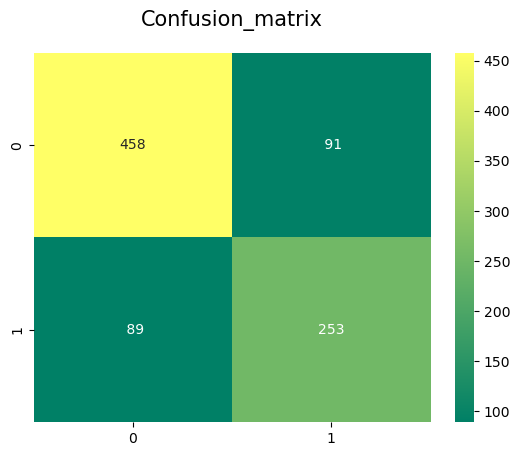

In [98]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(X_train,y_train)
prediction_gnb=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Gaussian Naive Bayes Classifier is',round(accuracy_score(prediction_gnb,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22, shuffle=True) # k=10, split the data into 10 equal parts
result_gnb=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Gaussian Naive Bayes classifier is:',round(result_gnb.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

## Python implementations of the models

1. **Bayes' Theorem.**

Bayes' theorem is also known as Bayes' Rule or Bayes' law, which is used to determine the probability of a hypothesis with prior knowledge. It depends on the conditional probability.
The formula for Bayes' theorem is given as:

$$P(y|X) = \frac{P(X)}{P(X|y) \cdot P(y)}$$

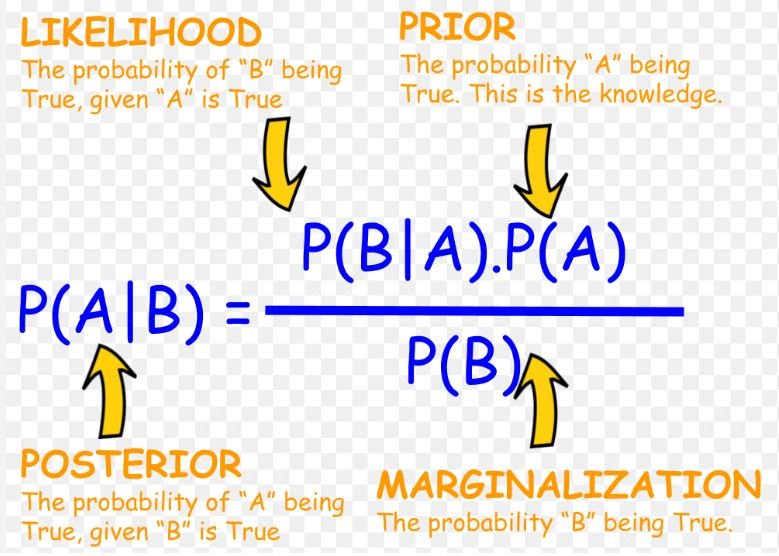

Where: 

* $P(y|X)$ is the probability of class y given the features X;
* $P(X|y)$ is the likelihood, the probability of observing features X given class y;
* $P(y)$ is the prior probability of class y;
* $P(X)$ is the evidence, the probability of observing the features X.

2. **Conditional Independence**

The "naive" assumption made by Naive Bayes is that all features are conditionally independent given the class label. In other words, the presence or absence of one feature does not affect the presence or absence of any other feature. This simplifies the calculation of the likelihood, making the model computationally tractable.

## Types of Naive Bayes Classifiers

1. <h4>Multinomial Naive Bayes. </h4>
Multinomial naive Bayes Feature vectors represent the frequencies with which certain events have been generated by a. This is the event model typically used for document
classification.

2. <h4>Gaussian Naive Bayes. </h4>
In the context of Gaussian Naive Bayes, it is assumed that the continuous values linked to each feature follow a Gaussian distribution, which is commonly referred to as a Normal distribution.

3. <h4>Bernoulli Naive Bayes. </h4>
In the multivariate Bernoulli event model, characteristics consist of independent boolean values (binary variables) that describe inputs. Similar to the multinomial model, this approach is well-known for tasks such as document classification, specifically focusing on the occurrence of binary terms.


<h4>Advantages</h4>

* Simplicity and speed: Naive Bayes is computationally efficient and can handle high-dimensional data;
* Works well with small datasets;
* Often performs surprisingly well, especially in text classification tasks;
* Provides probabilities, allowing for probabilistic predictions.

<h4>Limitations</h4>

* The "naive" assumption of feature independence may not hold in many real-world scenarios;
* If the features are highly correlated, Naive Bayes may produce suboptimal results.
* It doesn't handle missing data well.



Naive Bayes classifiers are widely used as a baseline model in many classification problems due to their simplicity and effectiveness, especially when working with text data. However, they may not be the best choice for every problem, and more complex models like decision trees, random forests, or neural networks may provide better accuracy in some cases.

###  Multinomial Naive Bayes
Here's an example of how to implement a Multinomial Naive Bayes classifier in Python using scikit-learn. In this example, we'll use the famous "20 Newsgroups" dataset for text classification, where the task is to classify news articles into one of 20 different categories.

In [99]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.25, random_state=42)

# Create a pipeline for text classification with Multinomial Naive Bayes
text_clf = Pipeline([
    ('vect', CountVectorizer()),  # Convert text to a bag-of-words representation
    ('tfidf', TfidfTransformer()),  # Convert raw frequency counts to TF-IDF values
    ('clf', MultinomialNB())  # Multinomial Naive Bayes classifier
])

# Fit the model on the training data
text_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = text_clf.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.65


In this code:

1. We load the 20 Newsgroups dataset and split it into training and testing sets.

2. We create a pipeline for text classification, which includes text preprocessing steps like converting text to a bag-of-words representation and then to TF-IDF (Term Frequency-Inverse Document Frequency) values.

3. We use the Multinomial Naive Bayes classifier from scikit-learn (MultinomialNB) as the final step in the pipeline.

4. We fit the model on the training data and make predictions on the test data.

5. Finally, the accuracy of the model is evaluated using scikit-learn's accuracy_score function.

### Gaussian Naive Bayes classifier

Here's an example of how to implement a Gaussian Naive Bayes classifier in Python using scikit-learn. Gaussian Naive Bayes is typically used for classification problems where the features are continuous and assumed to follow a Gaussian (normal) distribution.

In this example, we'll use a commonly used dataset for classification tasks:

In [100]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


In this code:

1. The Breast Cancer dataset is loaded using load_breast_cancer from scikit-learn's datasets.

2. The dataset is split into training and testing sets using train_test_split.

3. A Gaussian Naive Bayes classifier (GaussianNB) is instantiated.

4. The classifier is trained on the training data using the fit method.

5. Predictions are made on the test data using the predict method.

This example uses the Gaussian Naive Bayes classifier to predict whether a tumor is malignant or benign based on features such as mean radius, mean texture, mean smoothness, etc.

### Bernoulli Naive Bayes classifier


Here's an example of how to implement a Bernoulli Naive Bayes classifier in Python using scikit-learn. Bernoulli Naive Bayes is typically used for binary classification tasks where features are binary, representing the presence or absence of certain attributes.

In this example, we'll use a synthetic dataset for binary classification:

In [101]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bnb = BernoulliNB()

bnb.fit(X_train, y_train)

y_pred = bnb.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


In this code:

1. A synthetic binary classification dataset is generated using the make_classification function from scikit-learn. 

2. The dataset is divided into training and testing sets.

3. A Bernoulli Naive Bayes classifier is instantiated using the BernoulliNB class.

4. The model is trained on the provided training data.

5. Predictions are made on the test data, and the accuracy of the model is assessed.

This illustration showcases the application of Bernoulli Naive Bayes for solving a binary classification problem with binary features.